In [69]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose

import os

In [157]:
main_cwd = '/Users/yanting/OneDrive/Desktop/2023_11_18 Hackathon/2023_11_18-SE-Europe-Data_Challenge'
os.chdir(main_cwd)

os.chdir('./data')
df_main = pd.read_csv('processed_data.csv')
df_main.set_index('timestamp', inplace=True)
df_main.index = pd.to_datetime(df_main.index)
df_main.columns

Index(['SP_load_MAW', 'DE_B09_MAW', 'DE_B20_MAW', 'SE_load_MAW', 'NE_B20_MAW',
       'NE_B18_MAW', 'NE_B19_MAW', 'DK_load_MAW', 'DE_B18_MAW', 'DE_B19_MAW',
       ...
       'PO_green_surplus_MAW', 'HU_green_MAW', 'HU_green_surplus_MAW',
       'IT_green_MAW', 'IT_green_surplus_MAW', 'UK_green_MAW',
       'UK_green_surplus_MAW', 'max_surplus_country_name',
       'max_surplus_country_code', 'max_surplus_country_code_next_hr'],
      dtype='object', length=135)

In [4]:
relevant_cols = ['timestamp'] + [col for col in df_main.columns if ('load' in col or 'green' in col or 'surplus' in col)]
df_simp = df_main[relevant_cols]

df_simp.set_index('timestamp', inplace=True)
df_simp.index = pd.to_datetime(df_simp.index)

print(len(df_simp))
print(df_simp.columns)

8761
Index(['SP_load_MAW', 'SE_load_MAW', 'DK_load_MAW', 'PO_load_MAW',
       'NE_load_MAW', 'UK_load_MAW', 'IT_load_MAW', 'DE_load_MAW',
       'HU_load_MAW', 'SP_green_MAW', 'SP_green_surplus_MAW', 'DE_green_MAW',
       'DE_green_surplus_MAW', 'SE_green_MAW', 'SE_green_surplus_MAW',
       'NE_green_MAW', 'NE_green_surplus_MAW', 'DK_green_MAW',
       'DK_green_surplus_MAW', 'PO_green_MAW', 'PO_green_surplus_MAW',
       'HU_green_MAW', 'HU_green_surplus_MAW', 'IT_green_MAW',
       'IT_green_surplus_MAW', 'UK_green_MAW', 'UK_green_surplus_MAW',
       'max_surplus_country_name', 'max_surplus_country_code',
       'max_surplus_country_code_next_hr'],
      dtype='object')


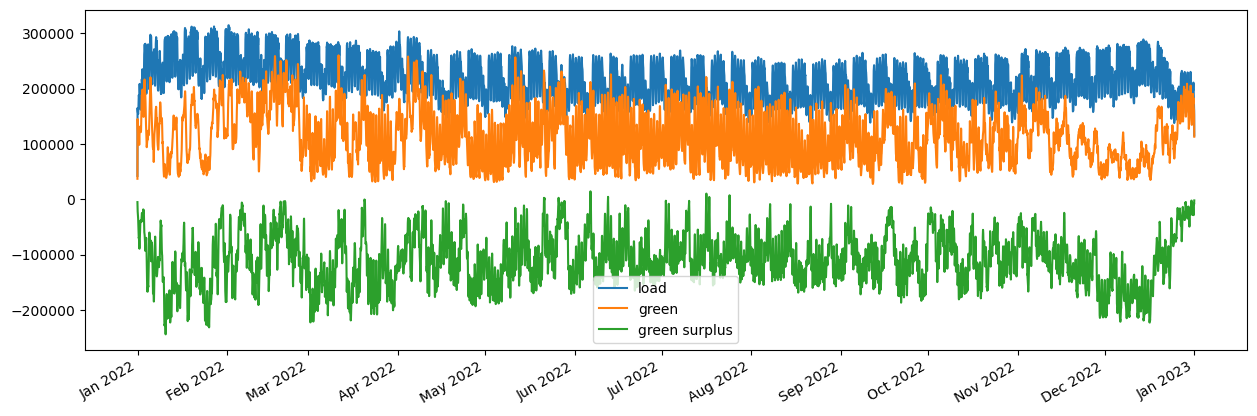

In [183]:
plt.figure(figsize=(15,5))

# plt.plot(df_simp['UK_load_MAW'])
# plt.plot(df_simp['UK_green_MAW'])
# plt.plot(df_simp['UK_green_surplus_MAW'])

plt.plot(df_simp['DE_load_MAW'], label='load')
plt.plot(df_simp['DE_green_MAW'], label='green')
plt.plot(df_simp['DE_green_surplus_MAW'], label='green surplus')

# Set x-axis locator and formatter for monthly labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

### ARIMA

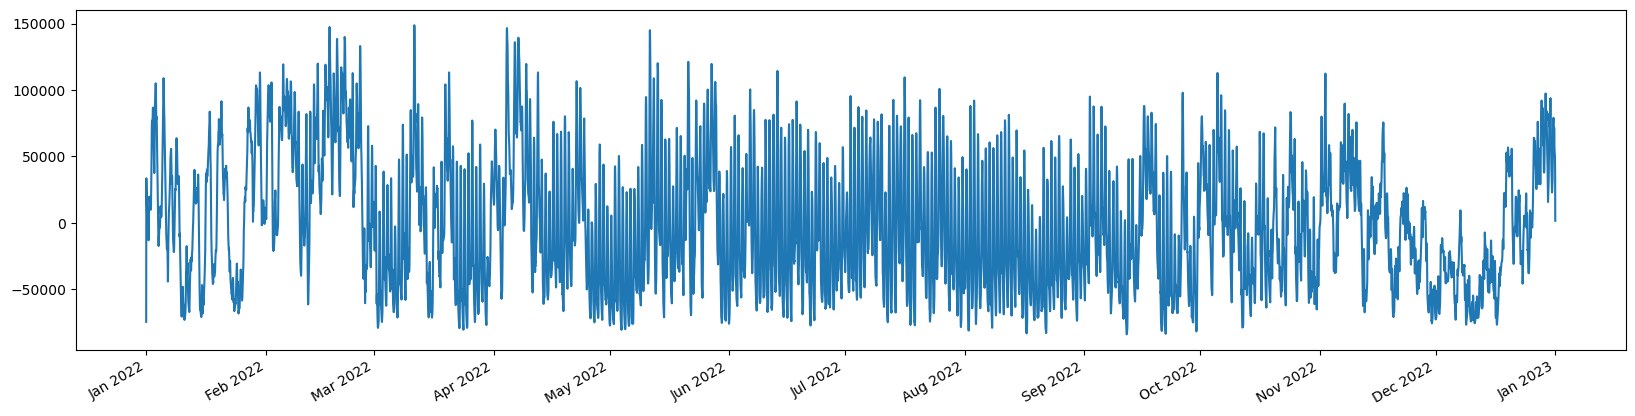

In [195]:
data_name = 'DE_green_MAW'
data = df_simp[data_name] - df_simp[data_name].mean()

plt.figure(figsize=(20,5))
plt.plot(data)

# Set x-axis locator and formatter for monthly labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()
plt.show()

p=0, q=0


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters foun

p=0, q=1


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=2


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=0, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible startin

p=0, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible startin

p=0, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=1, q=0


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p=1, q=1


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=1, q=2


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=1, q=3


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=1, q=4


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=1, q=5


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=2, q=0


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=2, q=1


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=2, q=2


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=2, q=3


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=2, q=4


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=2, q=5


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=3, q=0


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=3, q=1


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=3, q=2


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=3, q=3


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=3, q=4


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

p=3, q=5


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=4, q=0


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=4, q=1


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

p=4, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=4, q=3


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=4, q=4


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

p=4, q=5


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=5, q=0


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=5, q=1


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=5, q=2


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p=5, q=3


/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

p=5, q=4


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-statio

p=5, q=5


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/hy/gj03fhbj5wg417124pmms5t80000gn/T/ipykernel_14575/1739370171.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


p           4.000000
q           3.000000
BIC    173987.871540
AIC    173924.168952
Name: 27, dtype: float64


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


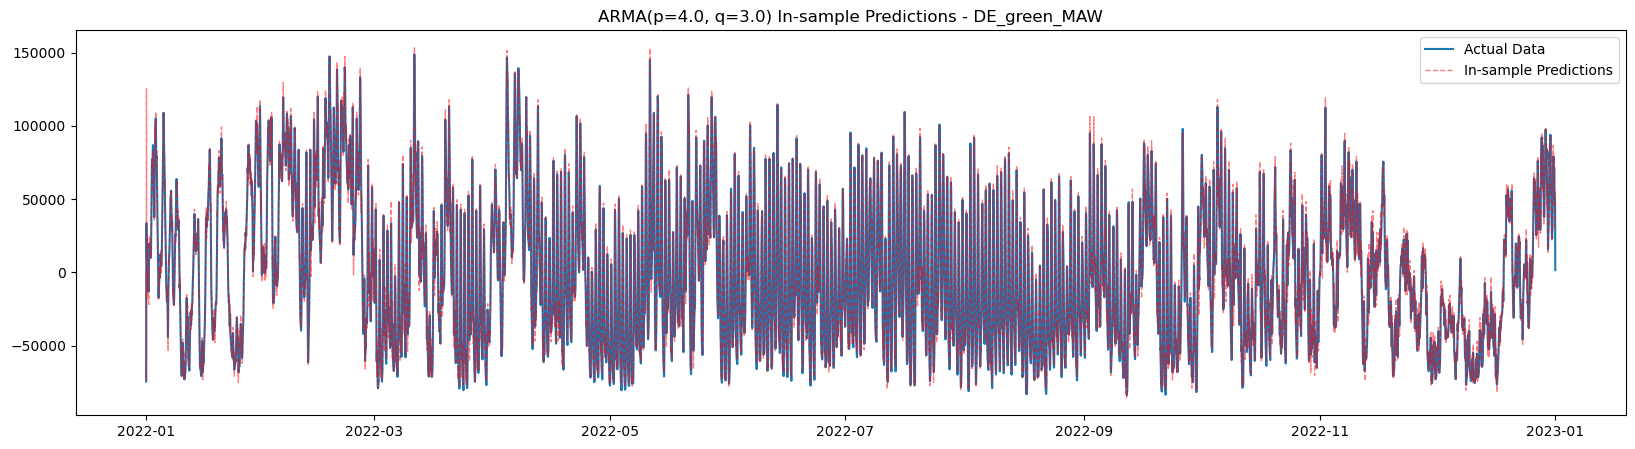

In [196]:
p_vals = range(6)
q_vals = range(6)

# Create dataframe to store results
results_df = pd.DataFrame(columns=['p', 'q', 'BIC', 'AIC'])

# Loop through p and q values
for p_val in p_vals:
    for q_val in q_vals:

        print(f"p={p_val}, q={q_val}")

        # Fit ARIMA model
        order = (p_val, 0, q_val)  # replace p, d, q with appropriate values

        model = ARIMA(data, order=order, freq='H')
        fit_model = model.fit()

        # Get BIC and AIC values
        bic = fit_model.bic
        aic = fit_model.aic

        # Save results in the dataframe
        results_df = results_df.append({'p': p_val, 'q': q_val, 'BIC': bic, 'AIC': aic}, ignore_index=True)
        
# Find the best p and q based on lowest combined AIC and BIC
best_params = results_df.loc[results_df['AIC'].idxmin()]
print(best_params)

# Use the best parameters to fit the final model
best_order = (best_params['p'], 0, best_params['q'])
final_model = ARIMA(data, order=best_order, freq='H')
final_fit = final_model.fit()

# In-sample predictions
predictions = final_fit.predict()

# Plot the original data and predictions
plt.figure(figsize=(20, 5))
plt.plot(data, label='Actual Data')
plt.plot(predictions, label='In-sample Predictions', color='red', lw=1, linestyle='--', alpha=0.5)
plt.title(f"ARMA(p={best_params['p']}, q={best_params['q']}) In-sample Predictions - {data_name}")
plt.legend()
plt.show()

### Try TBATS

In [167]:
from tbats import TBATS
import numpy as np

y = df_simp['DE_green_MAW'][:50]

# Create estimator
estimator = TBATS(
    seasonal_periods = [24],
    use_arma_errors = False,  # shall try only models without ARMA
    use_box_cox = False  # will not use Box-Cox
)

fitted_model = estimator.fit(y)

Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: []
Seasonal harmonics []
ARMA errors (p, q): (0, 0)
Smoothing (Alpha): 0.528893
Seasonal Parameters (Gamma): []
AR coefficients []
MA coefficients []
Seed vector [118366.06244538]

AIC 1179.542241
[118366.06244538  75360.65158835 112275.4776239  126093.09323774
 129543.54428112 128204.0983976  123461.98838616 121028.02723262
 117423.07560876 113170.73291227 113262.37272648 114467.52358775
 116310.44006562 117952.42123659 115240.03323788 110244.61776399
 104040.37178405 105533.24113791 111994.60392228 119730.40785792
 125701.39830973 127444.42019909 128851.58322036 130169.80593433
 129491.33837864 128147.7702486  127059.42920388 125437.61512352
 125028.98410591 123148.24768284 122703.31735953 123818.58563084
 129353.67392155 137996.4929673  147919.32967779 159890.12788578
 172063.59898154 180773.62712076 184490.35805622 185410.44314921
 185653.49972146 188210.96376706 192015.31295221 195410.11398605
 194505.64

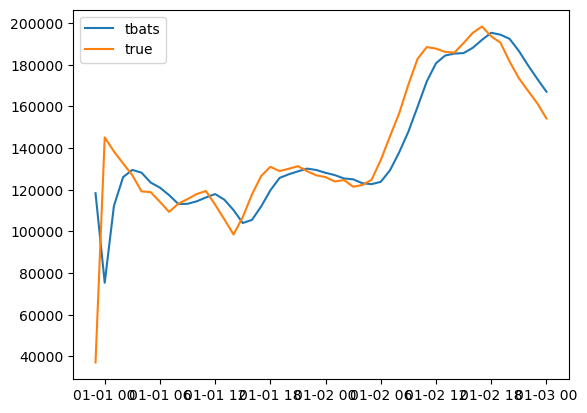

In [177]:
plt.plot(y.index, fitted_model.y_hat, label='tbats')
plt.plot(y.index, y, label='true')
plt.legend()
plt.show()

In [ ]:
# Forecast 14 steps ahead
y_forecasted = fitted_model.forecast(steps=14)

# Summarize fitted model
print(fitted_model.summary())

print(fitted_model.y_hat) # in sample prediction
print(fitted_model.resid) # in sample residuals
print(fitted_model.aic)

# Reading model parameters
print(fitted_model.params.alpha)
print(fitted_model.params.beta)
print(fitted_model.params.x0)
print(fitted_model.params.components.use_box_cox)
print(fitted_model.params.components.seasonal_harmonics)

--- 

### Exploratory Analysis

In [52]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag="AIC")
    return dftest

def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    return kpsstest


In [56]:
dfs = []
cols = df_simp.columns

# Loop through columns
for col in cols:

    try :
        # Perform ADF test
        adf_result = adfuller(df_simp[col].dropna())
        adf_p_value = adf_result[1]
        adf_stationary = adf_p_value < 0.05  # Set the significance level as needed

        # Perform KPSS test
        kpss_result = kpss_test(df_simp[col].dropna())
        kpss_p_value = kpss_result[1]
        kpss_stationary = kpss_p_value < 0.05  # Set the significance level as needed

        # Append results to the new DataFrame
        df_temp = pd.DataFrame({'Power Type': [col], 
                                'adf_p_value': [adf_p_value], 
                                'adf_stationary': [adf_stationary], 
                                'kpss_p_value': [kpss_p_value], 
                                'kpss_stationary': [kpss_stationary]})
        
        dfs.append(df_temp)

    except Exception as e :
        print(f'Error for column {col}: {e}')

results = pd.concat(dfs, ignore_index=True)

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values ava

Error for column max_surplus_country_name: could not convert string to float: 'DK'


/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


                          Power Type   adf_p_value  adf_stationary  \
0                        SP_load_MAW  1.841086e-14            True   
1                        SE_load_MAW  8.877247e-03            True   
2                        DK_load_MAW  8.488267e-11            True   
3                        PO_load_MAW  3.343831e-15            True   
4                        NE_load_MAW  1.209254e-11            True   
5                        UK_load_MAW  6.029358e-07            True   
6                        IT_load_MAW  4.188422e-20            True   
7                        DE_load_MAW  1.391079e-13            True   
8                        HU_load_MAW  8.734094e-13            True   
9                       SP_green_MAW  1.628220e-15            True   
10              SP_green_surplus_MAW  5.958646e-13            True   
11                      DE_green_MAW  5.550035e-12            True   
12              DE_green_surplus_MAW  5.344938e-15            True   
13                  

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [60]:
results.head(20)

,Power Type,adf_p_value,adf_stationary,kpss_p_value,kpss_stationary
0,SP_load_MAW,1.841086e-14,True,0.010000,True
1,SE_load_MAW,8.877247e-03,True,0.010000,True
2,DK_load_MAW,8.488267e-11,True,0.010000,True
3,PO_load_MAW,3.343831e-15,True,0.010000,True
4,NE_load_MAW,1.209254e-11,True,0.010000,True
5,UK_load_MAW,6.029358e-07,True,0.010000,True
6,IT_load_MAW,4.188422e-20,True,0.010000,True
7,DE_load_MAW,1.391079e-13,True,0.010000,True
8,HU_load_MAW,8.734094e-13,True,0.010000,True
9,SP_green_MAW,1.628220e-15,True,0.100000,False


In [158]:
data = df_simp['DE_load_MAW']
data = df_main['DE_B16_MAW']

In [89]:
from pmdarima import auto_arima

# Use auto_arima to find the optimal (p, d, q) values
# model = auto_arima(data, suppress_warnings=True, seasonal=False)
# order = model.get_params()['order']
# print(order)

In [159]:
# Fit ARIMA model
order = (0, 0, 7)  # replace p, d, q with appropriate values

model = ARIMA(data, order=order, freq='H')
fit_model = model.fit()

# Get BIC and AIC values
bic = fit_model.bic
aic = fit_model.aic

print(f"BIC: {bic}")
print(f"AIC: {aic}")

# In-sample predictions
predictions = fit_model.predict()

# Plot the original data and predictions
plt.figure(figsize=(20, 5))

plt.plot(data, label='Actual Data')
plt.plot(predictions, label='In-sample Predictions', color='red', lw=1, linestyle='--', alpha=0.5)

plt.title('ARIMA In-sample Predictions')
plt.xlabel('Time')
plt.ylabel('DE_load_MAW')

plt.legend()
plt.show()

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BIC: 184014.81854609592
AIC: 183951.11595810193


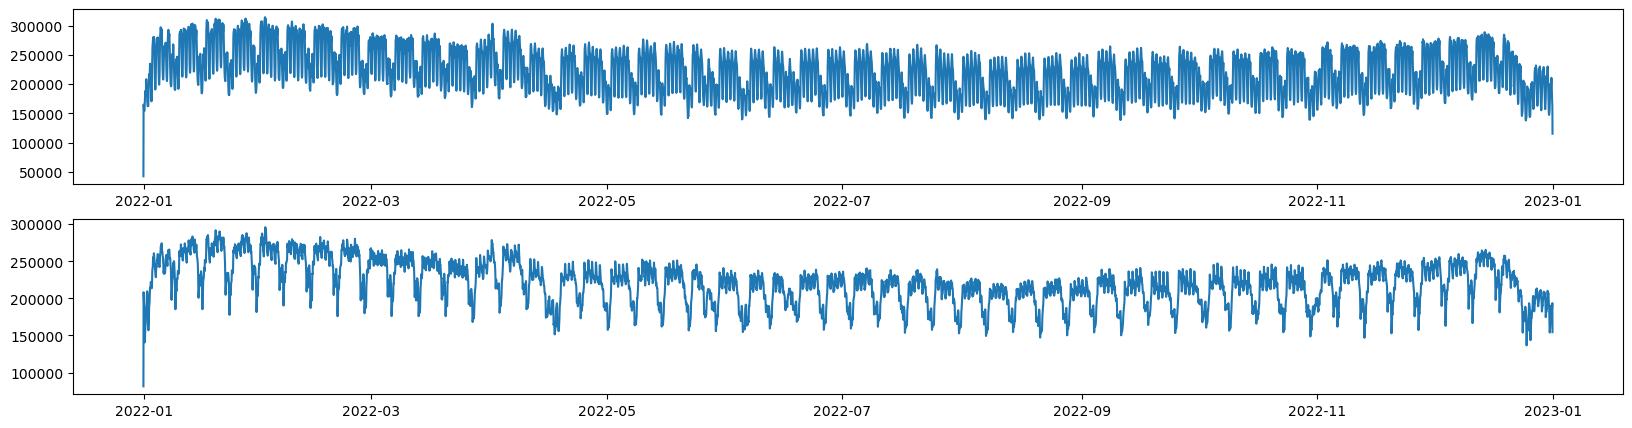

In [81]:
# weekdays, set period to 7
# hourly, set period to 24
# weekly, set period to 52
# daily, set period to 365

decomposition_weekly = seasonal_decompose(data, model='additive', period=52)
decomposition_hourly = seasonal_decompose(data, model='additive', period=24)
decomposition_weekday = seasonal_decompose(data, model='additive', period=7)
decomposition_yearly = seasonal_decompose(data, model='additive', period=1)

deseasoned_data = data - decomposition_hourly.seasonal

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(211)
ax1.plot(data)

ax2 = fig.add_subplot(212)
ax2.plot(deseasoned_data)

plt.show()

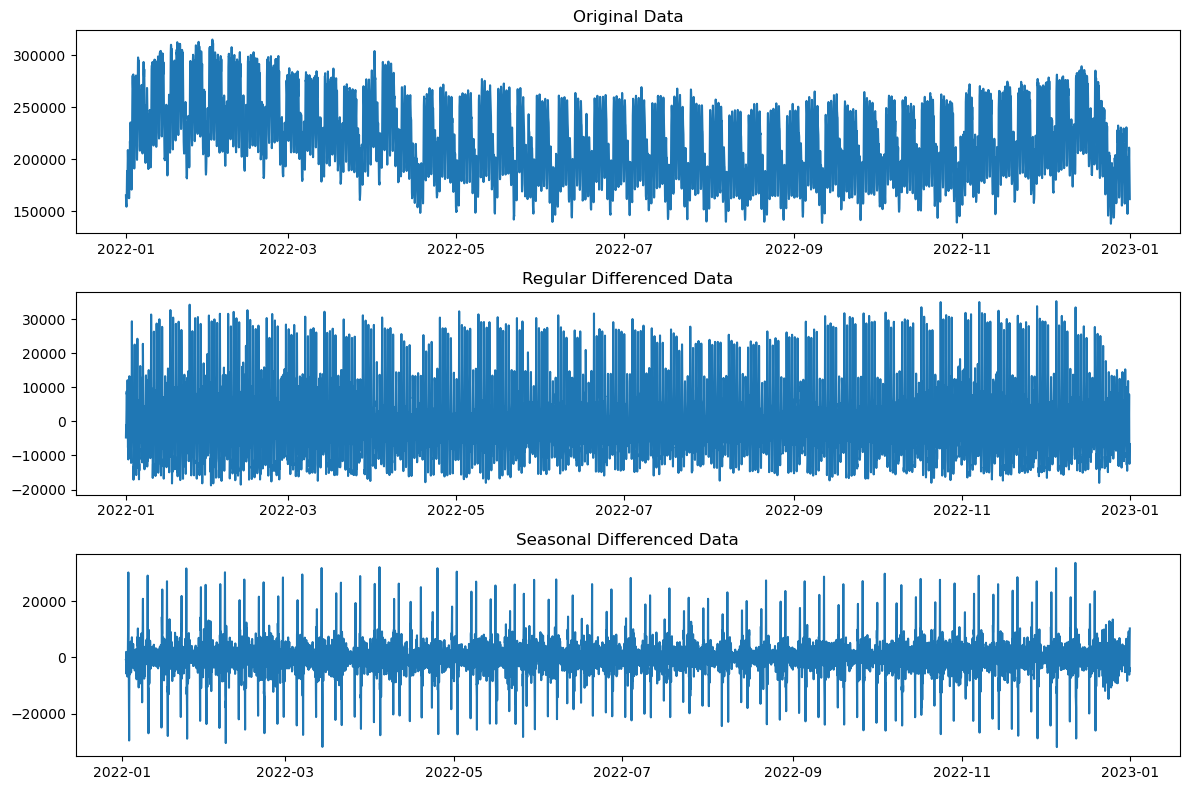

In [98]:
# Regular Differencing (to remove trends)
data_diff = data.diff().dropna()

# Seasonal Differencing (e.g., for weekly seasonality)
# Assuming you have daily data and want to remove the weekly pattern
seasonal_diff = data_diff.diff(periods=7).diff(periods=24).dropna()

# Plot the original data, regular differenced data, and seasonal differenced data
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(data, label='Original Data')
plt.title('Original Data')

plt.subplot(312)
plt.plot(data_diff, label='Regular Differenced Data')
plt.title('Regular Differenced Data')

plt.subplot(313)
plt.plot(seasonal_diff, label='Seasonal Differenced Data')
plt.title('Seasonal Differenced Data')

plt.tight_layout()
plt.show()

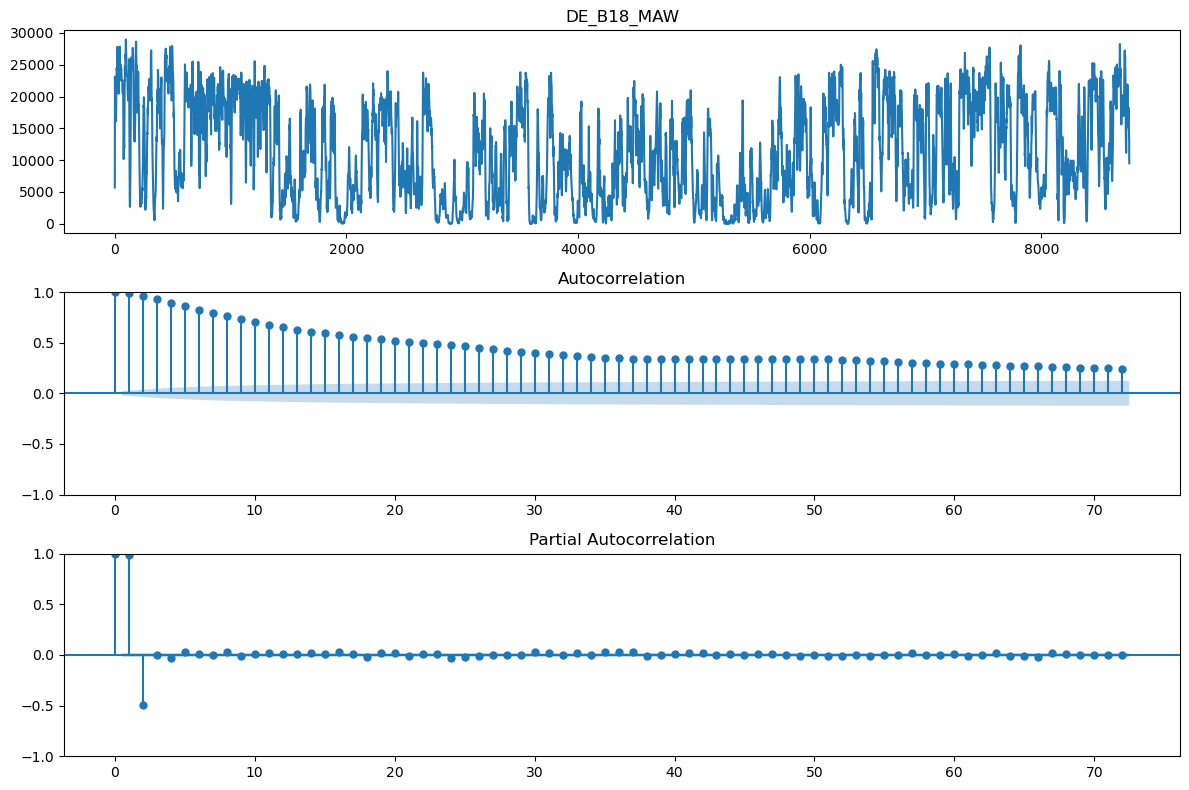

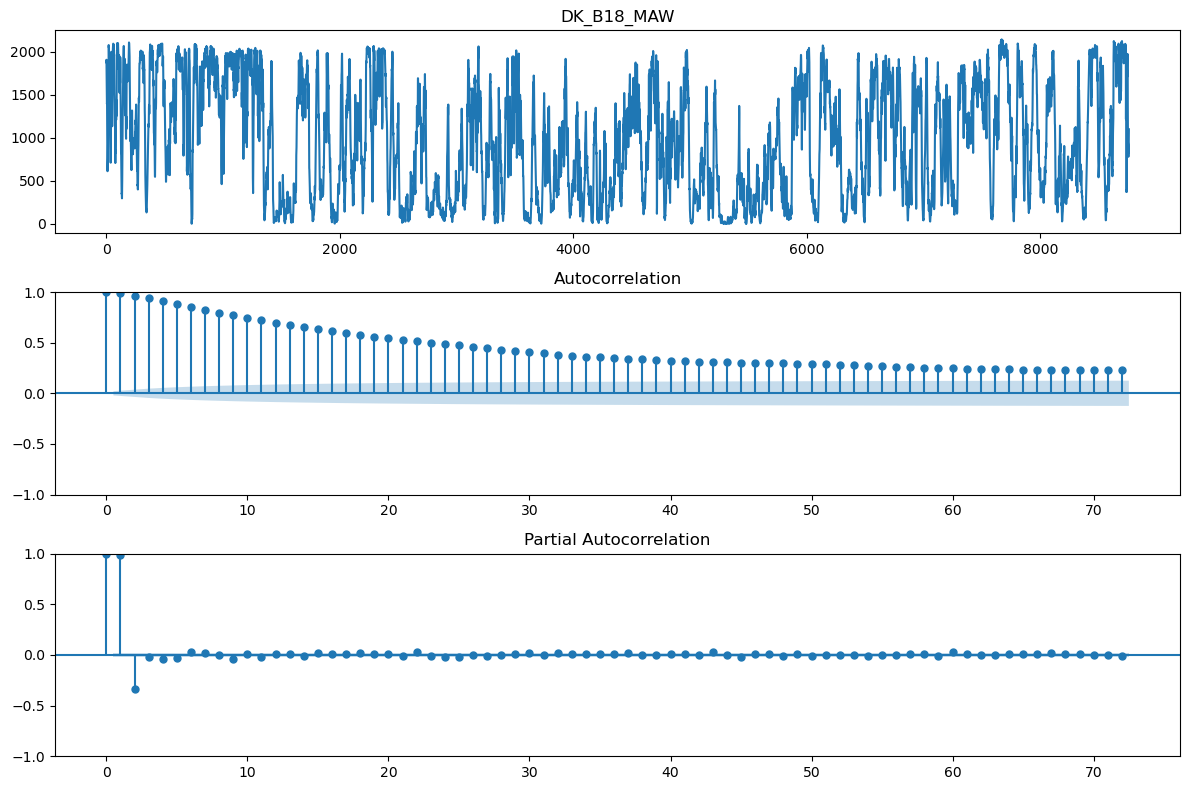

In [126]:
# data = df_main['DE_load_MAW']
# data = df_main['DE_B16_MAW'].dropna()

# data = df_simp['DK_load_MAW'].dropna()
# data = df_simp['DK_green_MAW'].dropna()

pwr_types = ['DE_B18_MAW', 'DK_B18_MAW']

for pwr_type in pwr_types :

    data = df_main[pwr_type].dropna()

    fig = plt.figure(figsize=(12, 8))

    ax1 = fig.add_subplot(311)
    ax1.plot(data)
    ax1.set_title(pwr_type)

    ax2 = fig.add_subplot(312)
    fig = sm.graphics.tsa.plot_acf(data.squeeze(), lags=72, ax=ax2)

    ax3 = fig.add_subplot(313)
    fig = sm.graphics.tsa.plot_pacf(data, lags=72, ax=ax3)

    plt.tight_layout()
    

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


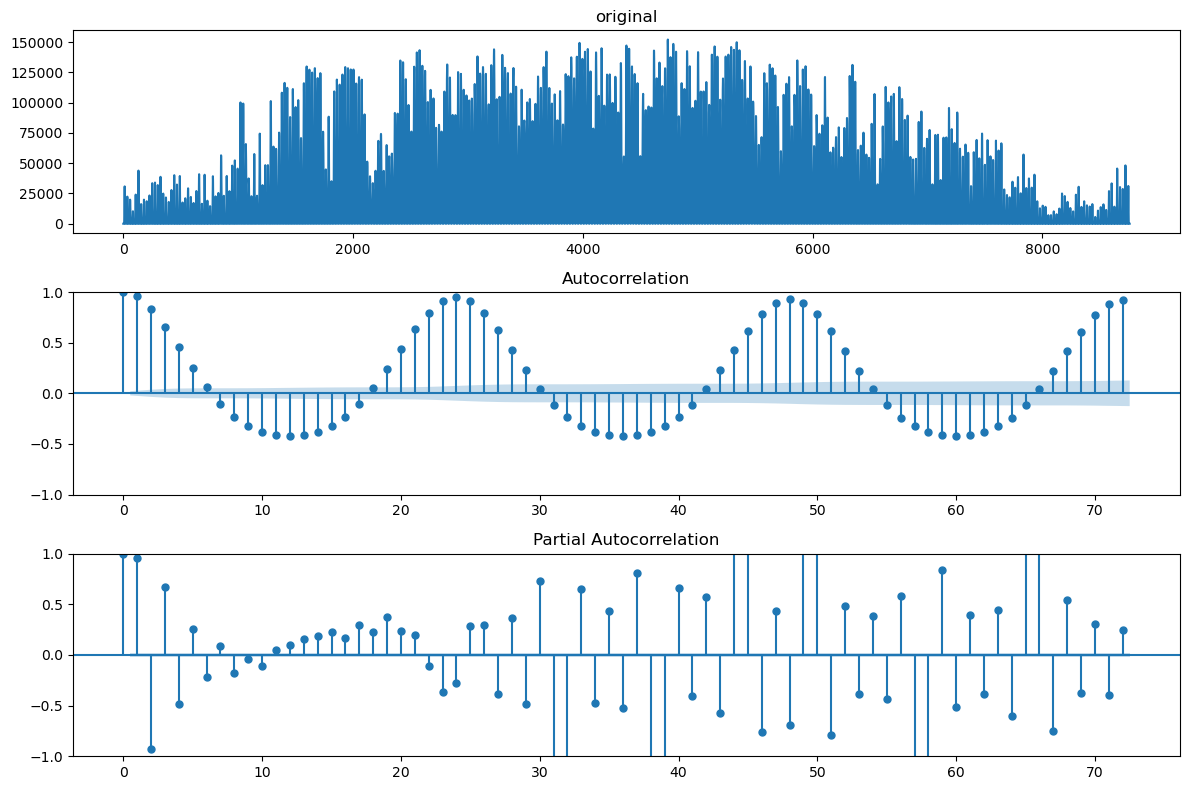

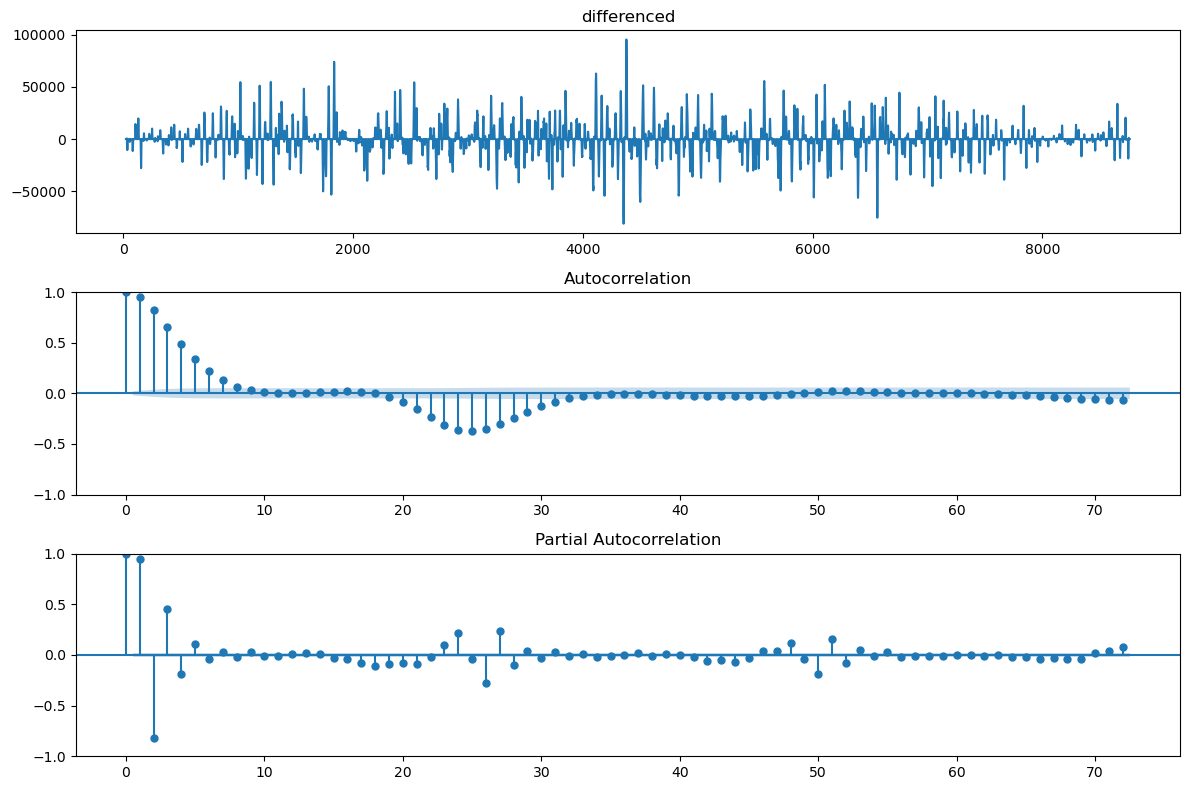

In [127]:
data = df_main['DE_B16_MAW'].dropna()
seasonal_diff = data.diff(periods=24).dropna()

data_list = [data, seasonal_diff]

for idx, data in enumerate(data_list) :

    fig = plt.figure(figsize=(12, 8))

    ax1 = fig.add_subplot(311)
    ax1.plot(data)
    
    if (idx == 0) :
        ax1.set_title('original')
    if (idx == 1) :
        ax1.set_title('differenced')

    ax2 = fig.add_subplot(312)
    fig = sm.graphics.tsa.plot_acf(data.squeeze(), lags=72, ax=ax2)

    ax3 = fig.add_subplot(313)
    fig = sm.graphics.tsa.plot_pacf(data, lags=72, ax=ax3)

    plt.tight_layout()
    

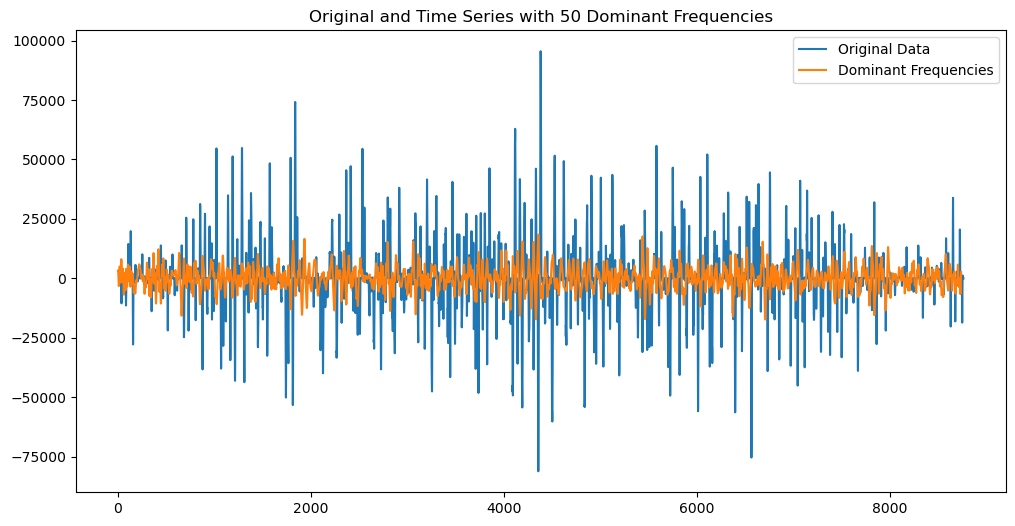

In [150]:
data = df_main['DE_B16_MAW'].diff(periods=24).dropna()

# Calculate the FFT
fft_result = np.fft.fft(data)
n = len(data)
frequencies = np.fft.fftfreq(n)

# Find the indices of the frequencies with the highest amplitude
num_peaks = 50
indices_of_peaks = np.argsort(np.abs(fft_result))[::-1][:num_peaks]  # Set num_peaks to the desired number of dominant frequencies

# Extract the frequencies and corresponding amplitudes
dominant_frequencies = frequencies[indices_of_peaks]
dominant_amplitudes = np.abs(fft_result[indices_of_peaks])

# Inverse FFT to get the time series corresponding to the dominant frequencies
filtered_fft_result = np.zeros_like(fft_result)
filtered_fft_result[indices_of_peaks] = fft_result[indices_of_peaks]
filtered_data = np.fft.ifft(filtered_fft_result).real

# Plot the original and filtered time series
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(filtered_data, label='Dominant Frequencies')
plt.title(f'Original and Time Series with {num_peaks} Dominant Frequencies')
plt.legend()
plt.show()